In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


In [10]:
# df = pd.read_csv('/Users/rodrigocarrillo/Downloads/Combined_df_ten_shot_Mistral-Large-Instruct-2411.Q5_K_S.csv')
df = pd.read_csv('C:/Users/rmcarri/OneDrive - Emory University/NHANES/Macronutrients LLMs/03.Results/Adolescents/Mistral-Large-Instruct-2411.Q5_K_S/Combined_df_ten_shot_day2_chunk1_Mistral-Large-Instruct-2411.Q5_K_S.csv')
df

,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,id_study,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,LLM_answer,model_basename
0,21005,2,"CHEESE,CHEDDAR/AMERICAN TYPE,NS NATURAL OR PRO...",2211,104.66,239.73,140.01,6.9,93.24,NHANES_2003_2004,...,4,2.44,NaN,0.0,0.0,0.0,NaN,21005_NHANES_2003_2004,1888.88; 116.88; 168.88; 78.88; 10.88; 116.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf
1,21006,2,"CHEESE,CHEDDAR/AMERICAN TYPE,NS NATURAL OR PRO...",1218,34.71,184.23,71.49,8.0,39.70,NHANES_2003_2004,...,4,2.47,NaN,1.0,0.0,0.0,NaN,21006_NHANES_2003_2004,1488.88; 63.88; 216.88; 118.88; 10.88; 63.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf
2,21007,2,"MILK, COW'S, FLUID, WHOLE (198.25); ROLL, WHIT...",746,26.57,86.64,42.11,6.1,33.86,NHANES_2003_2004,...,3,1.60,NaN,0.0,0.0,NaN,NaN,21007_NHANES_2003_2004,1186.88; 43.88; 148.88; 68.88; 10.88; 60.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf
3,21008,2,"MILK, COW'S, FLUID, 2% FAT (488); PANCAKES, PL...",2014,72.71,263.57,108.29,10.9,74.51,NHANES_2003_2004,...,4,2.75,NaN,0.0,0.0,0.0,NaN,21008_NHANES_2003_2004,1688.58; 68.88; 238.98; 136.88; 4.8; 66.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf
4,21013,2,"PORK CHOP, BREADED, FRIED, LEAN ONLY (22); CHI...",681,16.54,107.17,67.67,3.9,21.79,NHANES_2003_2004,...,4,0.59,NaN,0.0,0.0,NaN,NaN,21013_NHANES_2003_2004,650.23; 32.12; 102.34; 78.90; 2.34; 23.45,Mistral-Large-Instruct-2411.Q5_K_S.gguf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,26686,2,"CHEESE, NATURAL, CHEDDAR OR AMERICAN TYPE (28....",1490,49.75,185.29,117.69,4.0,62.68,NHANES_2003_2004,...,3,5.00,NaN,0.0,0.0,NaN,NaN,26686_NHANES_2003_2004,1628.58; 76.88; 196.88; 128.88; 4.8; 86.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf
1125,26690,2,"MILK, COW'S, FLUID, 2% FAT (335.5); MILK, COW'...",3005,84.54,410.89,205.39,14.1,116.53,NHANES_2003_2004,...,1,0.54,NaN,0.0,0.0,0.0,NaN,26690_NHANES_2003_2004,2000.00; 70.00; 280.00; 150.00; 10.00; 70.00,Mistral-Large-Instruct-2411.Q5_K_S.gguf
1126,26695,2,"MILK, COW'S, FLUID, 2% FAT (441.95); MILK, COW...",5997,311.68,573.91,373.44,11.0,270.24,NHANES_2003_2004,...,3,1.17,NaN,0.0,0.0,0.0,NaN,26695_NHANES_2003_2004,2490.88; 118.88; 338.88; 198.88; 10.88; 118.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf
1127,26707,2,"MILK, COW'S, FLUID, 2% FAT (244); MILK, CHOCOL...",1519,59.16,165.16,77.00,9.9,69.66,NHANES_2003_2004,...,3,5.00,NaN,0.0,0.0,0.0,NaN,26707_NHANES_2003_2004,1588.5; 63.8; 208.5; 116.5; 6.5; 66.5,Mistral-Large-Instruct-2411.Q5_K_S.gguf


In [11]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_answer'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}")
print(f"Consistent rows: {sum(mask)}")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1129
Inconsistent rows: 1
Consistent rows: 1128


,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,id_study,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,LLM_answer,model_basename
905,25544,2,"ICE CREAM, REGULAR, NOT CHOCOLATE (174.56); CH...",1546,35.36,210.04,133.18,8.5,65.84,NHANES_2003_2004,...,1,1.25,NaN,0.0,0.0,NaN,NaN,25544_NHANES_2003_2004,1234.56; 78.90; 123.45; 67.89; 10.00; 50.00\n\...,Mistral-Large-Instruct-2411.Q5_K_S.gguf


In [12]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1128, 22)

In [13]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred', 'DRxIPROT_pred', 'DRxICARB_pred',
                'DRxISUGR_pred', 'DRxIFIBE_pred', 'DRxITFAT_pred']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_answer'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,id_study,...,smoker,id,LLM_answer,model_basename,DRxIKCAL_pred,DRxIPROT_pred,DRxICARB_pred,DRxISUGR_pred,DRxIFIBE_pred,DRxITFAT_pred
0,21005,2,"CHEESE,CHEDDAR/AMERICAN TYPE,NS NATURAL OR PRO...",2211,104.66,239.73,140.01,6.9,93.24,NHANES_2003_2004,...,NaN,21005_NHANES_2003_2004,1888.88; 116.88; 168.88; 78.88; 10.88; 116.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf,1888.88,116.88,168.88,78.88,10.88,116.88
1,21006,2,"CHEESE,CHEDDAR/AMERICAN TYPE,NS NATURAL OR PRO...",1218,34.71,184.23,71.49,8.0,39.70,NHANES_2003_2004,...,NaN,21006_NHANES_2003_2004,1488.88; 63.88; 216.88; 118.88; 10.88; 63.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf,1488.88,63.88,216.88,118.88,10.88,63.88
2,21007,2,"MILK, COW'S, FLUID, WHOLE (198.25); ROLL, WHIT...",746,26.57,86.64,42.11,6.1,33.86,NHANES_2003_2004,...,NaN,21007_NHANES_2003_2004,1186.88; 43.88; 148.88; 68.88; 10.88; 60.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf,1186.88,43.88,148.88,68.88,10.88,60.88
3,21008,2,"MILK, COW'S, FLUID, 2% FAT (488); PANCAKES, PL...",2014,72.71,263.57,108.29,10.9,74.51,NHANES_2003_2004,...,NaN,21008_NHANES_2003_2004,1688.58; 68.88; 238.98; 136.88; 4.8; 66.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf,1688.58,68.88,238.98,136.88,4.80,66.88
4,21013,2,"PORK CHOP, BREADED, FRIED, LEAN ONLY (22); CHI...",681,16.54,107.17,67.67,3.9,21.79,NHANES_2003_2004,...,NaN,21013_NHANES_2003_2004,650.23; 32.12; 102.34; 78.90; 2.34; 23.45,Mistral-Large-Instruct-2411.Q5_K_S.gguf,650.23,32.12,102.34,78.90,2.34,23.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,26686,2,"CHEESE, NATURAL, CHEDDAR OR AMERICAN TYPE (28....",1490,49.75,185.29,117.69,4.0,62.68,NHANES_2003_2004,...,NaN,26686_NHANES_2003_2004,1628.58; 76.88; 196.88; 128.88; 4.8; 86.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf,1628.58,76.88,196.88,128.88,4.80,86.88
1125,26690,2,"MILK, COW'S, FLUID, 2% FAT (335.5); MILK, COW'...",3005,84.54,410.89,205.39,14.1,116.53,NHANES_2003_2004,...,NaN,26690_NHANES_2003_2004,2000.00; 70.00; 280.00; 150.00; 10.00; 70.00,Mistral-Large-Instruct-2411.Q5_K_S.gguf,2000.00,70.00,280.00,150.00,10.00,70.00
1126,26695,2,"MILK, COW'S, FLUID, 2% FAT (441.95); MILK, COW...",5997,311.68,573.91,373.44,11.0,270.24,NHANES_2003_2004,...,NaN,26695_NHANES_2003_2004,2490.88; 118.88; 338.88; 198.88; 10.88; 118.88,Mistral-Large-Instruct-2411.Q5_K_S.gguf,2490.88,118.88,338.88,198.88,10.88,118.88
1127,26707,2,"MILK, COW'S, FLUID, 2% FAT (244); MILK, CHOCOL...",1519,59.16,165.16,77.00,9.9,69.66,NHANES_2003_2004,...,NaN,26707_NHANES_2003_2004,1588.5; 63.8; 208.5; 116.5; 6.5; 66.5,Mistral-Large-Instruct-2411.Q5_K_S.gguf,1588.50,63.80,208.50,116.50,6.50,66.50


In [ ]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable:")
results_df.T



Metrics by Variable:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,724185.4633,559.0494,0.2277,850.9909,0.3048
DRxIPROT,802.9929,18.9193,0.2878,28.3371,0.5533
DRxICARB,11662.8439,70.6158,0.2313,107.9946,0.3755
DRxISUGR,2796.5062,35.3899,0.2823,52.8820,0.5279
DRxIFIBE,36.6687,3.9714,0.3122,6.0555,0.4388
DRxITFAT,1194.6100,23.0784,0.3175,34.5631,0.4305


In [ ]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples:")
ttest_results.T


Calculate the t-test on TWO RELATED samples:


,t_statistic,p_value
DRxIKCAL,21.797199,0.000000
DRxIPROT,3.383881,0.000739
DRxICARB,17.941728,0.000000
DRxISUGR,7.145141,0.000000
DRxIFIBE,13.749285,0.000000
DRxITFAT,9.554589,0.000000


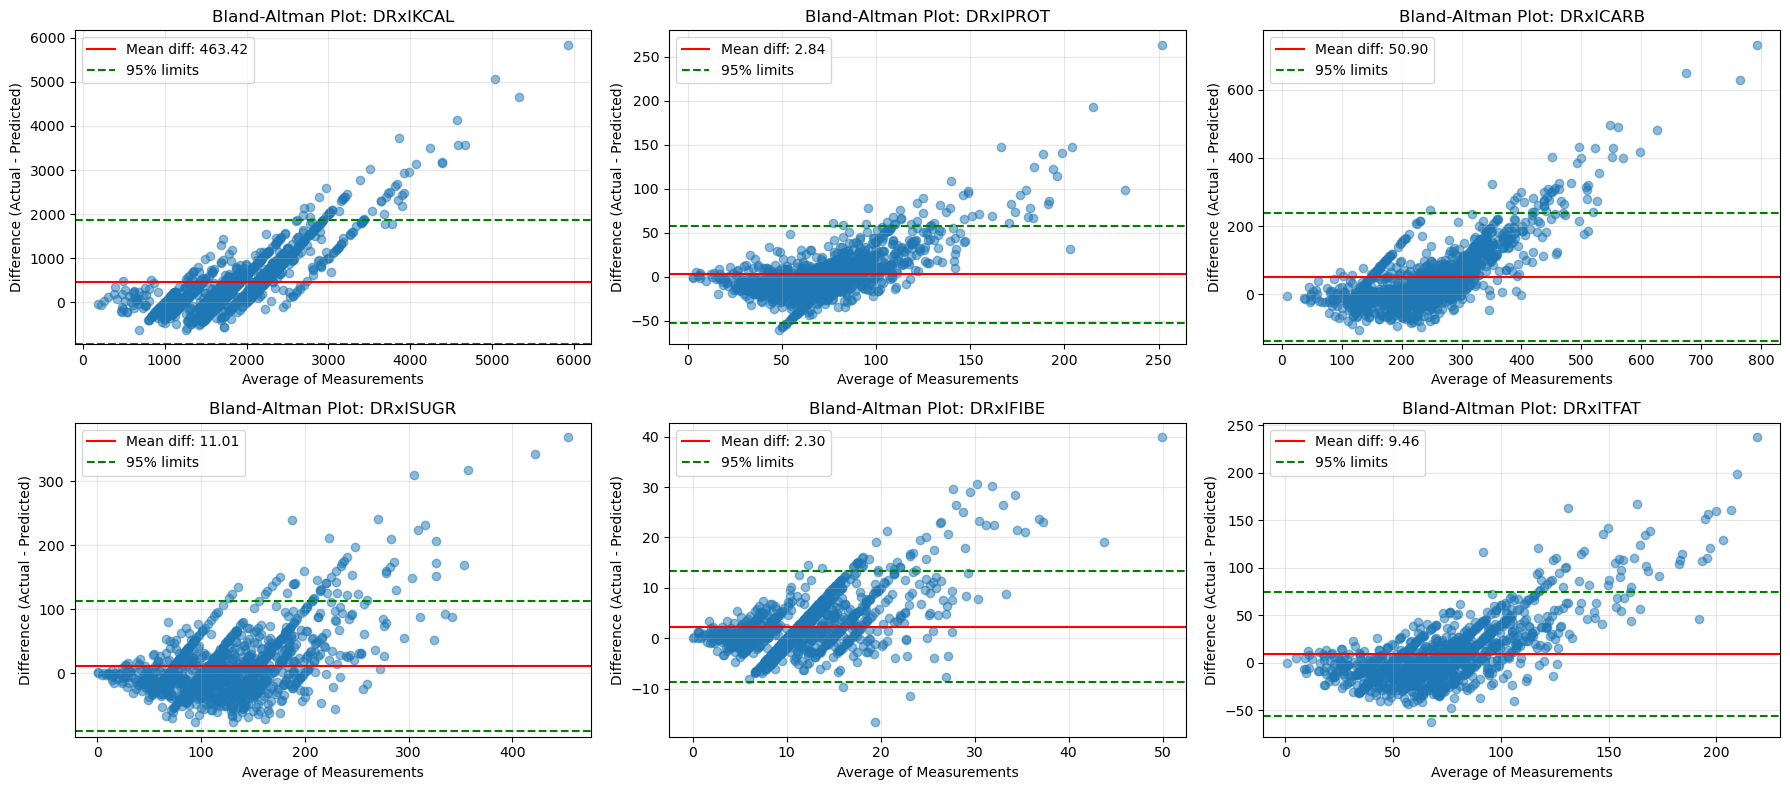

In [26]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxISUGR 0.592594
DRxIPROT 0.552539
DRxIFIBE 0.475805
DRxITFAT 0.417551
DRxICARB 0.352391
DRxIKCAL 0.269978

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.8251


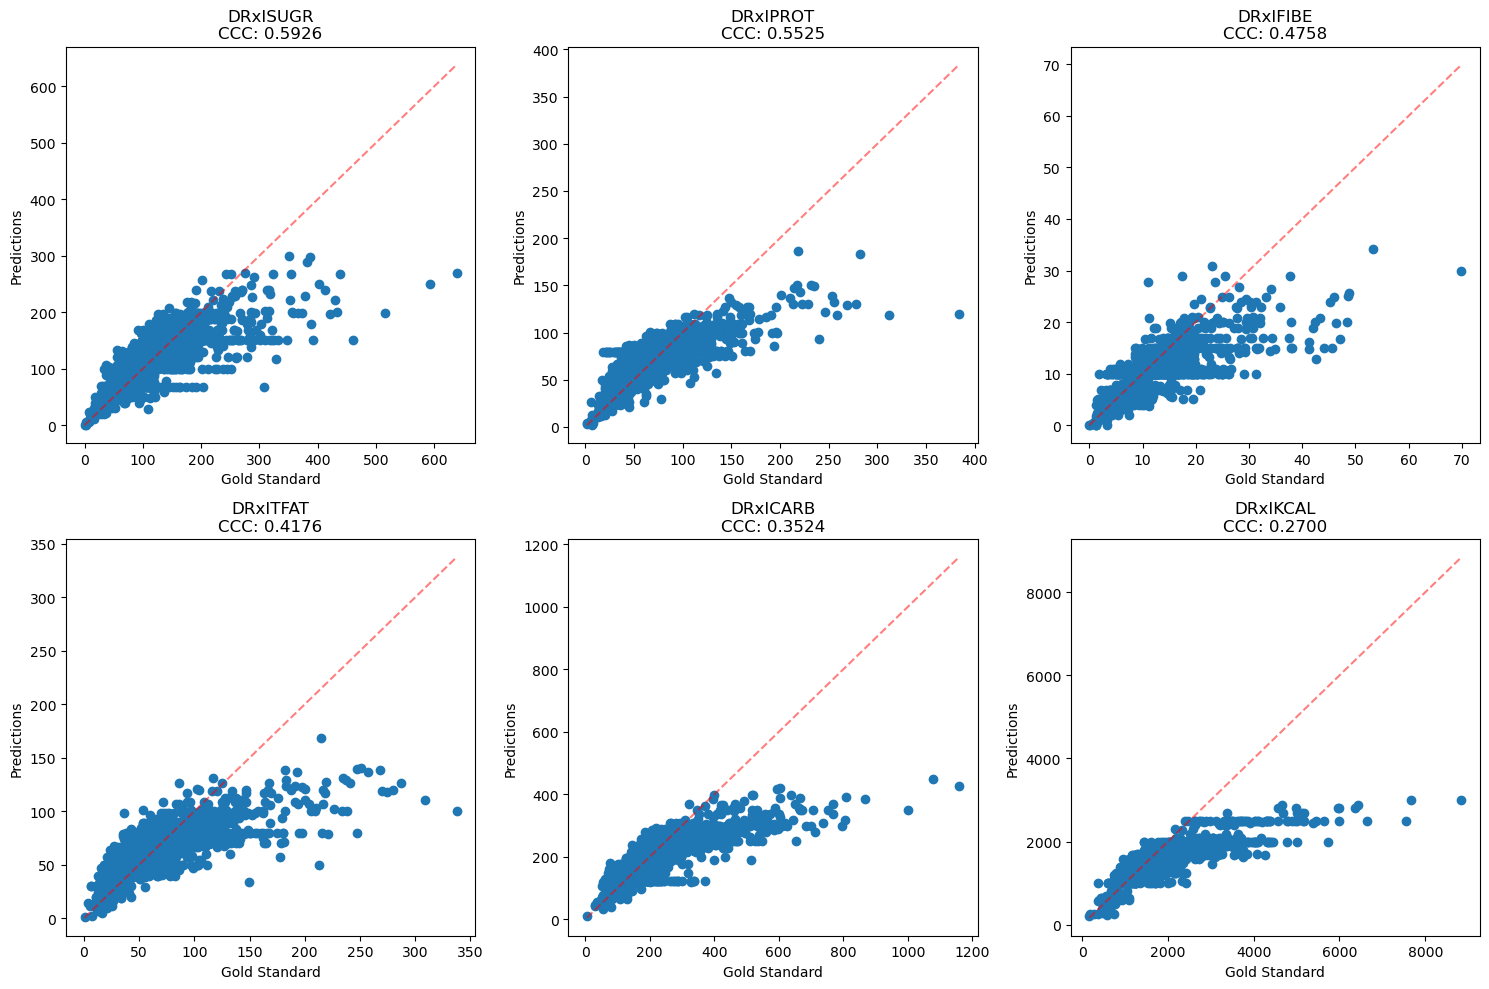

In [34]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred', 'DRxIPROT_pred', 'DRxICARB_pred',
                 'DRxISUGR_pred', 'DRxIFIBE_pred', 'DRxITFAT_pred']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()